<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week5/BMI_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [104]:

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


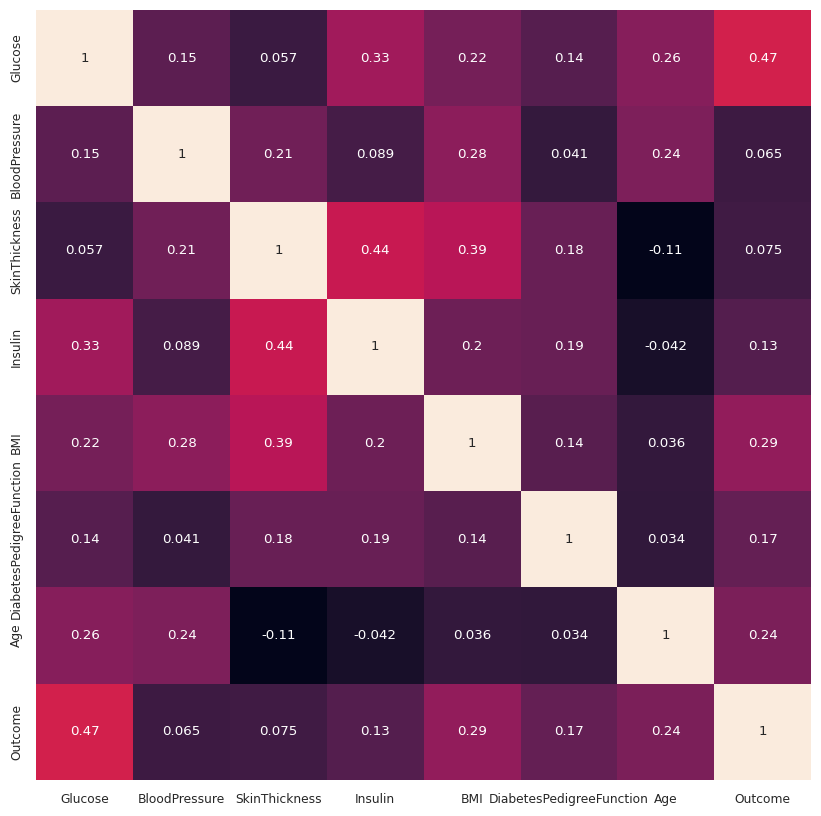

In [105]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [106]:

# 2. X, y 분리 (BMI 예측)
X = df.drop(columns=["BMI"])  # 입력 변수
y = df["BMI"]  # 예측할 대상

In [107]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [108]:
# 4. 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [109]:
# 5. DL 모델 정의 (회귀용)
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 연속값 예측 → linear 활성화

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
# 6. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',              # 회귀에서는 MSE 사용
    metrics=['mae', 'mse']   # 정확도(accuracy)는 사용 X
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# 7. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1099.6053 - mae: 32.2298 - mse: 1099.6053 - val_loss: 1000.2814 - val_mae: 30.5998 - val_mse: 1000.2814
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 955.1651 - mae: 30.0704 - mse: 955.1651 - val_loss: 715.2213 - val_mae: 25.8469 - val_mse: 715.2213
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 607.6335 - mae: 23.5847 - mse: 607.6335 - val_loss: 211.5051 - val_mae: 12.8288 - val_mse: 211.5051
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 152.9935 - mae: 10.1938 - mse: 152.9935 - val_loss: 132.0504 - val_mae: 7.8772 - val_mse: 132.0504
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.9049 - mae: 6.9504 - mse: 96.9049 - val_loss: 91.4786 - val_mae: 6.6107 - val_mse: 91.4786
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7152 - mae: 6.8117 - mse: 79.7152 - val_loss: 87.4520 - val_mae: 6.3836 - val_mse: 87.4520
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70

In [112]:
# 8. 평가
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 MAE: {mae:.4f}")
print(f"DL 모델 테스트 MSE: {mse:.4f}")

DL 모델 테스트 MAE: 5.4936
DL 모델 테스트 MSE: 61.2788


In [113]:
# 9. 학습 곡선 시각화
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

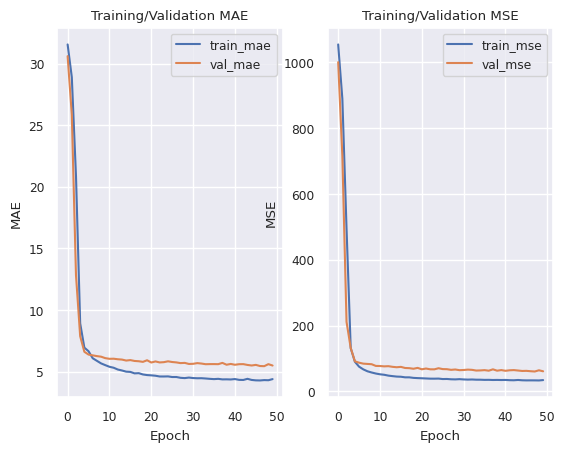

In [114]:
# MAE 그래프
plt.subplot(1,2,1)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training/Validation MAE")

# MSE 그래프
plt.subplot(1,2,2)
plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Training/Validation MSE")

plt.show()

#두 그래프 모두 MSE, MAE의 값이 매우 컸으나, 일정 반복수 이후 안정적으로 줄어들고 있는 모습을 볼 수 있음. 학습 중반 이후부터는 훈련 셋과 , 검증 셋의 값 (train,val)이 거의 비슷하고 일정 값에 수렴하고 있으므로 학습이 잘 되었다고 확인이 가능함.
